In [15]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

import sys

sys.path.append("../utils/")
%aimport utils

/home/nanni/anaconda3/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
result_folder = "./results/"

date = "20180607"
experiment = "1vsALL_NN_NN"

In [3]:
def read_result_file(cancer_name, date, experiment):
    cancer_path = list(filter(lambda x: date in x and experiment in x and cancer_name in x,os.listdir(result_folder)))[0]
    file = os.path.join(result_folder, cancer_path)
    file = os.path.join(file, "results.xlsx")
    
    alone = pd.read_excel(file, sheet_name="{}_alone".format(cancer_name))
    alone_mean = alone.loc["mean"]
    alone = alone.drop("mean", axis=0)
    others = pd.read_excel(file, sheet_name="{}_others".format(cancer_name))
    others_mean = others.loc["mean"]
    others = others.drop("mean", axis=0)
    tl = pd.read_excel(file, sheet_name="{}_TL".format(cancer_name))
    tl_mean = tl.loc["mean"]
    tl = tl.drop("mean", axis=0)
    return alone, alone_mean, others, others_mean, tl, tl_mean

In [4]:
tumor_names = list(map(lambda y: y.split("_")[2] ,filter(lambda x: date in x and experiment in x, os.listdir(result_folder))))
", ".join(tumor_names)

'HNSC, LUSC, READ, ESCA, STAD, CHOL, KIRP, LUAD, BLCA, PRAD, KICH, KIRC, GBM, THCA, UCEC, LIHC, BRCA, COAD'

In [10]:
deltas = None
tl_alones = None
tl_others = None
tl_tls = None
for tn in tumor_names:
    print(tn)
    tn_alone, tn_alone_mean, \
    tn_others, tn_others_mean, \
    tn_tl, tn_tl_mean = read_result_file(tn, date, experiment)
    
    tn_deltas = (tn_tl_mean - tn_alone_mean).to_frame(tn)
    deltas = pd.concat((deltas, tn_deltas), axis=1)
    tl_alones = pd.concat((tl_alones, tn_alone_mean.to_frame(tn).T), axis=0)
    tl_others = pd.concat((tl_others, tn_others_mean.to_frame(tn).T), axis=0)
    tl_tls = pd.concat((tl_tls, tn_tl_mean.to_frame(tn).T), axis=0)

HNSC
LUSC
READ
ESCA
STAD
CHOL
KIRP
LUAD
BLCA
PRAD
KICH
KIRC
GBM
THCA
UCEC
LIHC
BRCA
COAD


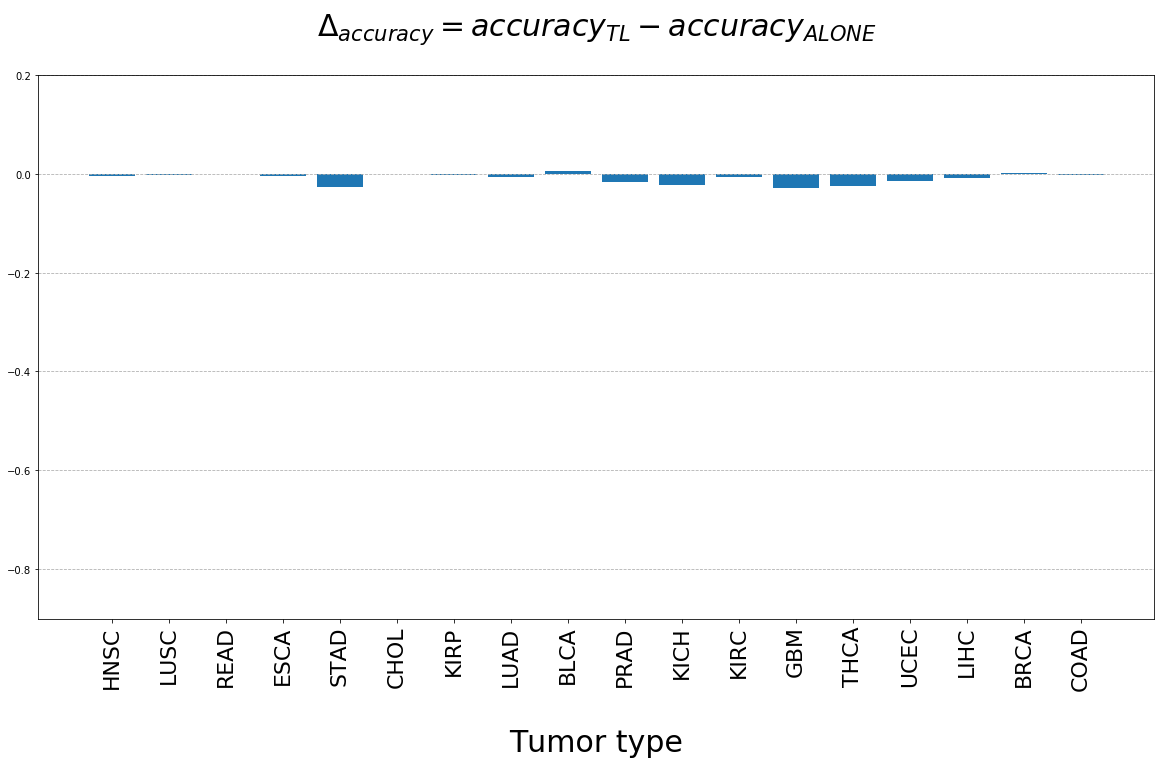

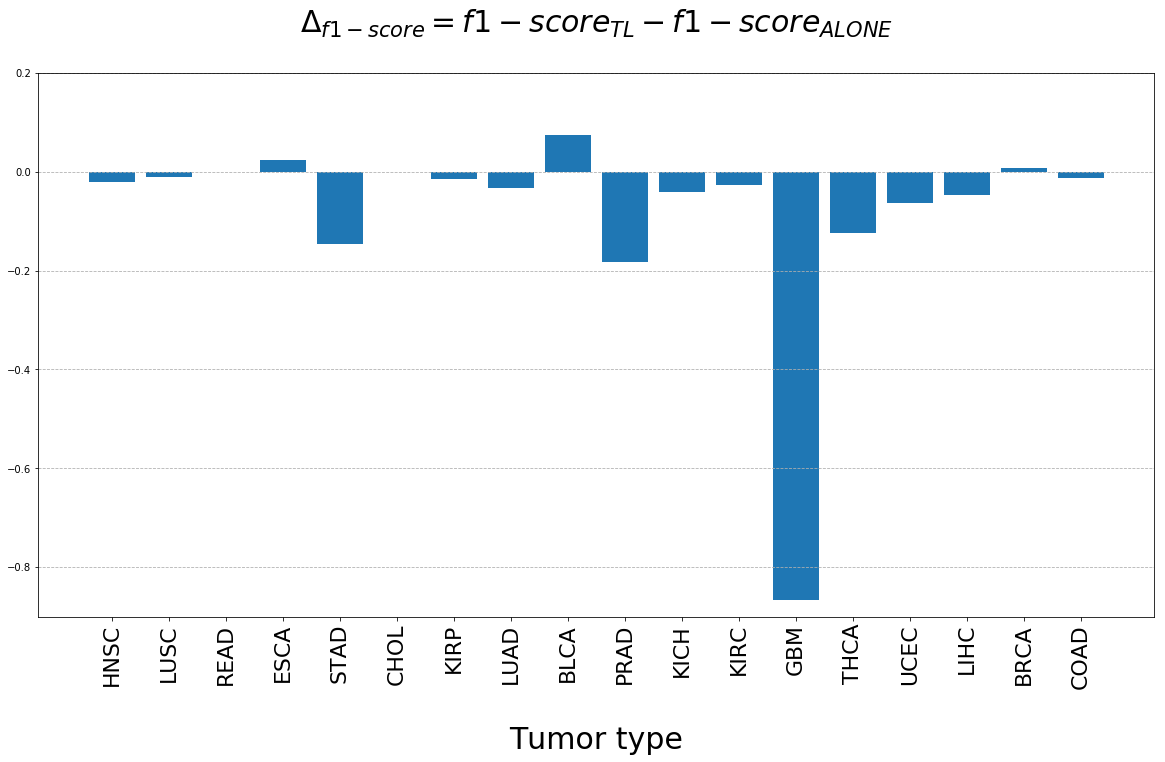

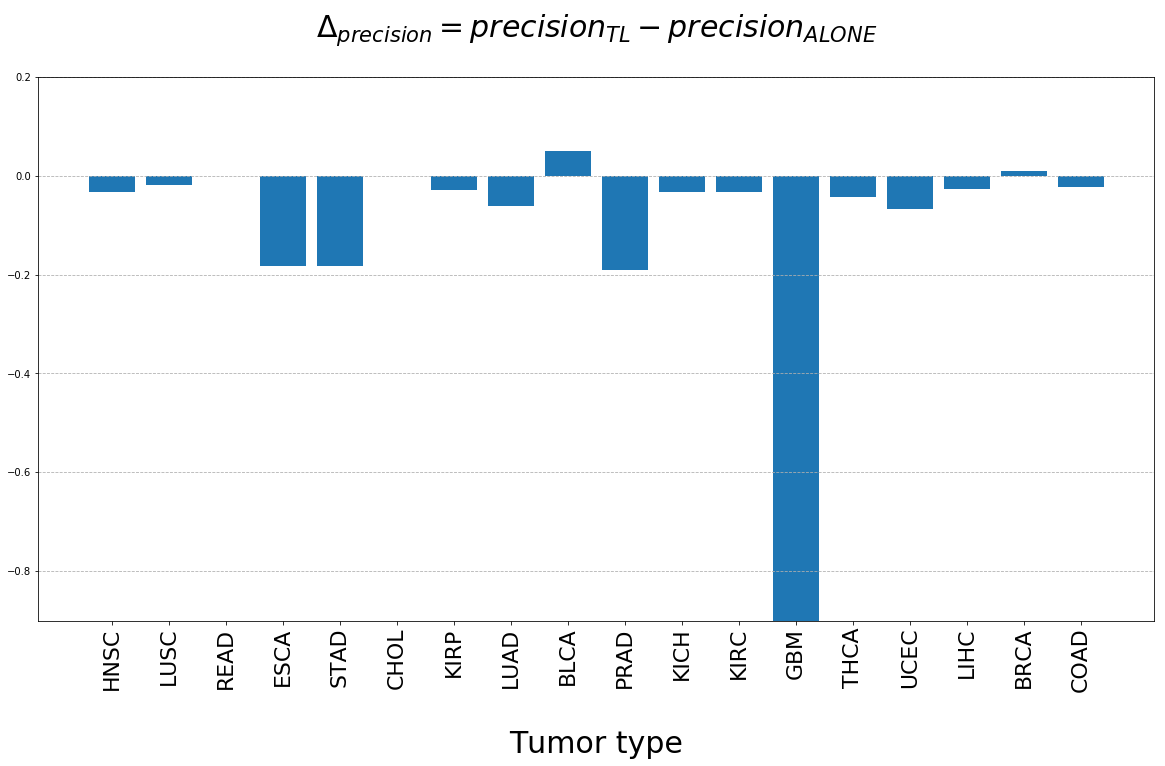

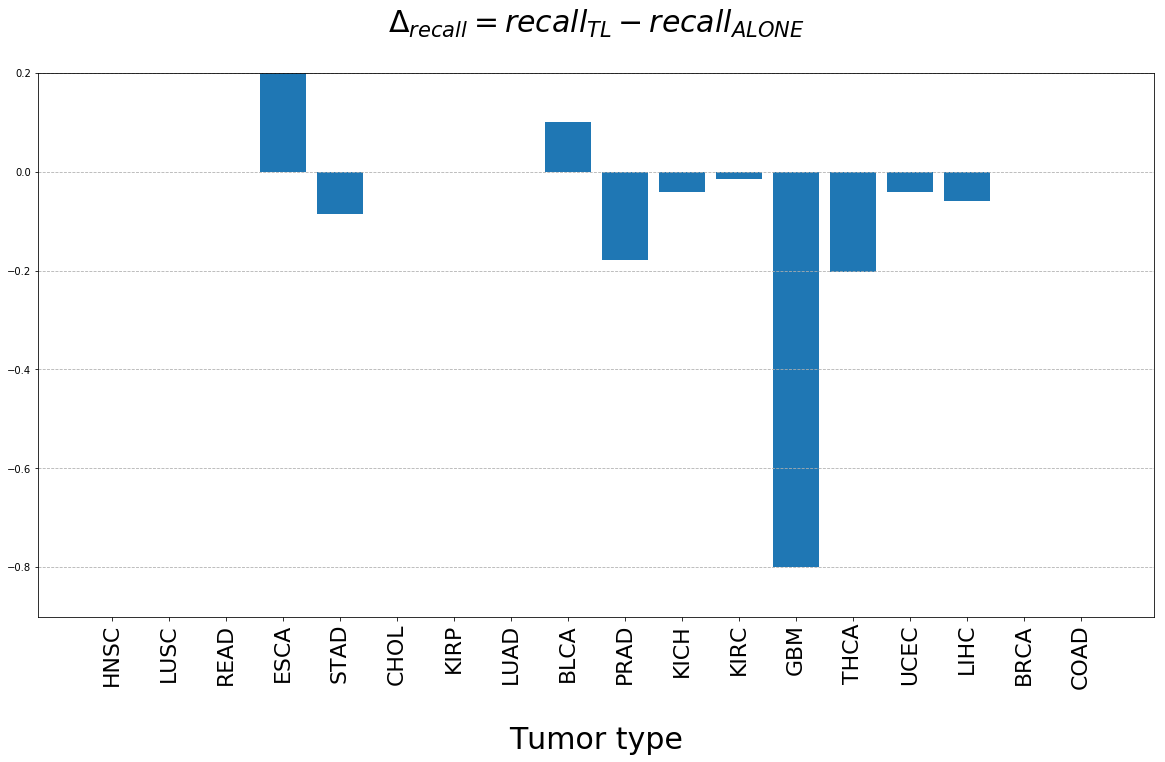

In [89]:
def plot_differences(deltas, measure):
    min_delta, max_delta = deltas.min().min(), deltas.max().max()
    
    plt.figure(figsize=(20, 10))
    plt.bar(x = np.arange(deltas.shape[1]), height=deltas.loc[measure])
    plt.xticks(np.arange(deltas.shape[1]), deltas.columns, rotation='vertical', fontsize=22)
    plt.grid(True, axis='y', linestyle='--')
    plt.xlabel("\nTumor type", fontsize=30)
    plt.ylim(ymin = min_delta, ymax = max_delta)
    plt.title("$\Delta_{{{}}} = {}_{{{}}} - {}_{{{}}}$\n".format(measure, measure, "TL", measure, "ALONE"), 
              fontsize=30)
    plt.show()
    
plot_differences(deltas, "accuracy")
plot_differences(deltas, "f1-score")
plot_differences(deltas, "precision")
plot_differences(deltas, "recall")

In [13]:
writer = pd.ExcelWriter(os.path.join(result_folder, "results_merged.xlsx"), engine='xlsxwriter')

In [17]:
tl_tls.to_excel(writer, sheet_name="TL")
tl_others.to_excel(writer, sheet_name="OTHERS")
tl_alones.to_excel(writer, sheet_name="ALONE")
deltas.to_excel(writer, sheet_name="DELTA_TL_ALONE")
writer.save()